In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RahinUlde/DataSets/refs/heads/main/Titanic_train.csv', index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understanding the Data

In [3]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
df.shape

(891, 11)

In [5]:
print(df['Pclass'].value_counts())
print(df['Pclass'].unique())

3    491
1    216
2    184
Name: Pclass, dtype: int64
[3 1 2]


In [6]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<Axes: >

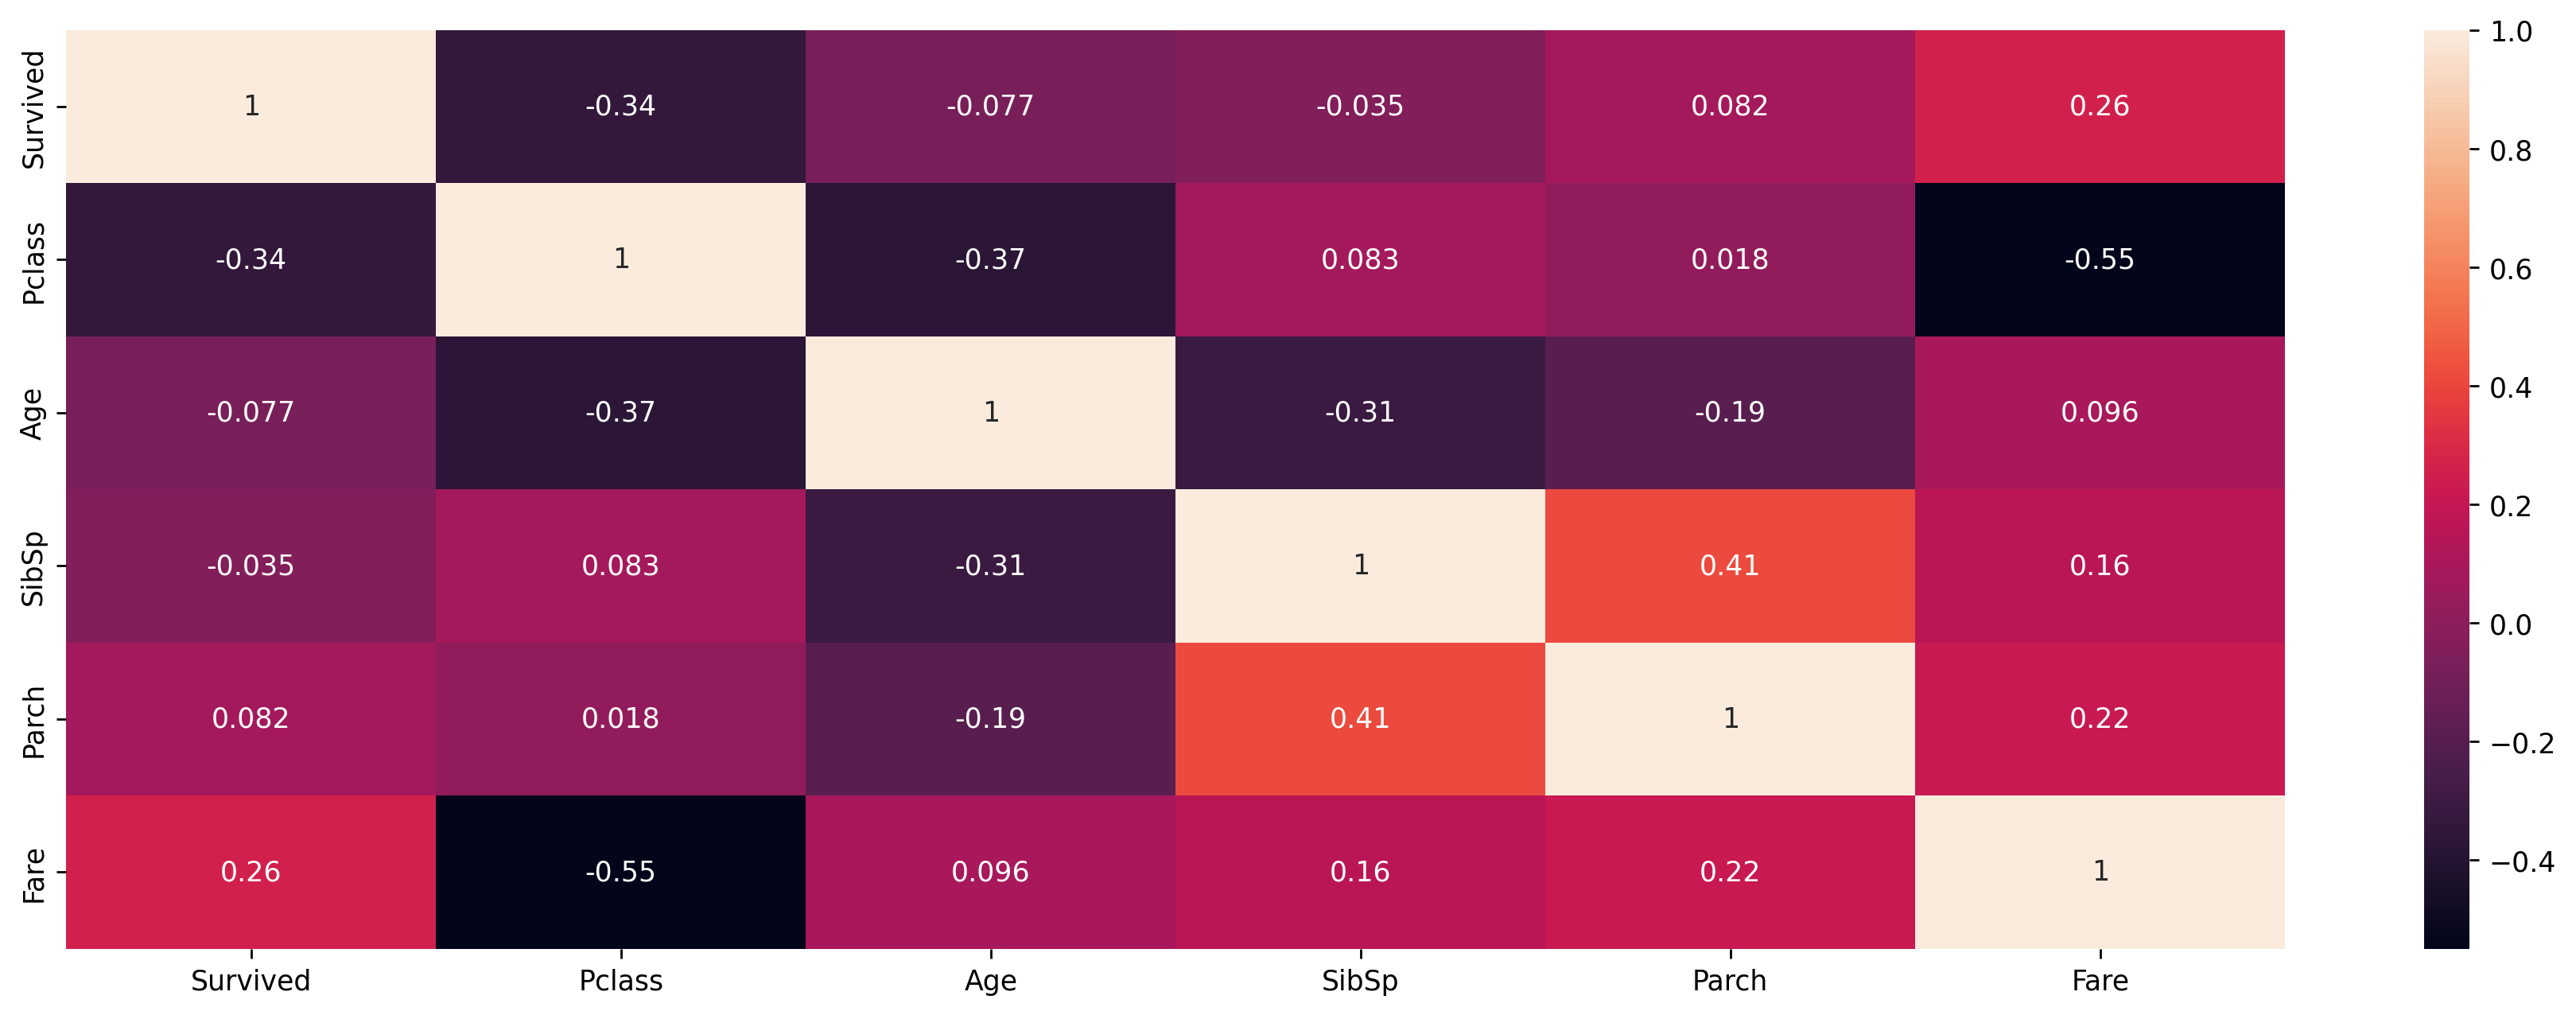

In [7]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True)

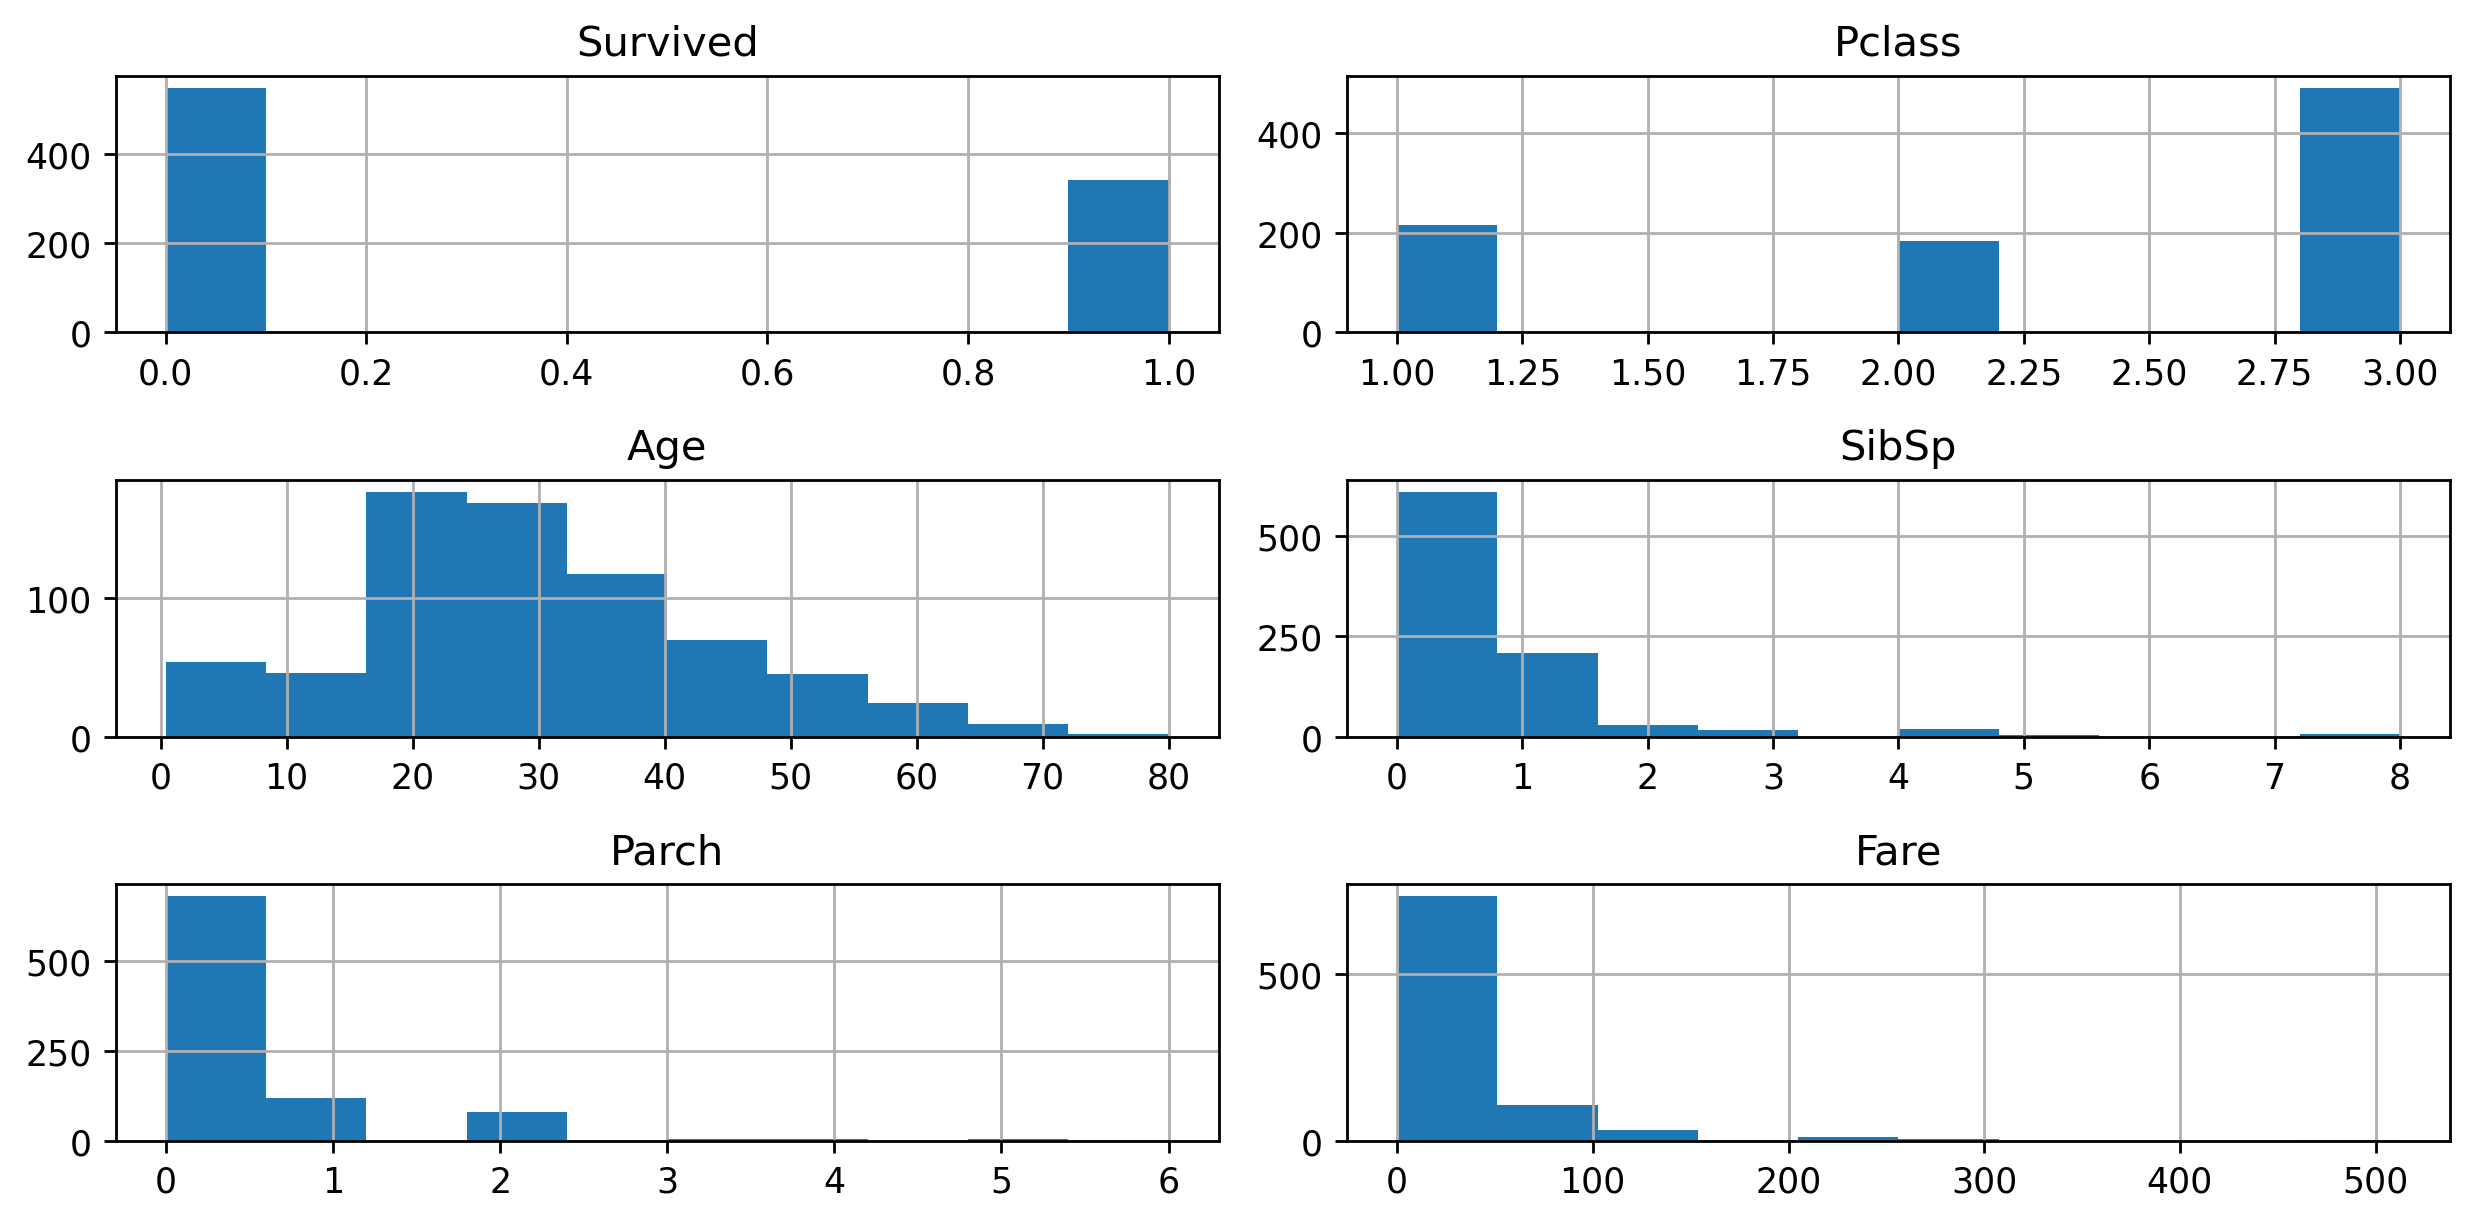

In [8]:
df.hist()
plt.tight_layout()

## Dropping unwanted columns 

In [9]:
df.drop(columns=['Cabin','Name'], inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


## Encoding Pclass, Sex and Embarked columns

In [11]:
df = pd.get_dummies(data=df,columns= ['Pclass'])

In [12]:
df = pd.get_dummies(data=df,columns= ['Sex'])

In [13]:
df = pd.get_dummies(data=df,columns= ['Embarked'])

In [14]:
df

,Survived,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
2,1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
4,1,35.0,1,0,113803,53.1000,1,0,0,1,0,0,0,1
5,0,35.0,0,0,373450,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,211536,13.0000,0,1,0,0,1,0,0,1
888,1,19.0,0,0,112053,30.0000,1,0,0,1,0,0,0,1
889,0,NaN,1,2,W./C. 6607,23.4500,0,0,1,1,0,0,0,1


## Scaling Fare column

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

In [17]:
df.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled
PassengerId,,,,,,,,,,,,,,,
1,0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1,-0.502445
2,1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0,0.786845
3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1,-0.488854
4,1,35.0,1,0,113803,53.1000,1,0,0,1,0,0,0,1,0.420730
5,0,35.0,0,0,373450,8.0500,0,0,1,0,1,0,0,1,-0.486337


In [18]:
df.drop(columns=['Fare'], inplace=True)

In [19]:
df.head()

,Survived,Age,SibSp,Parch,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,A/5 21171,0,0,1,0,1,0,0,1,-0.502445
2,1,38.0,1,0,PC 17599,1,0,0,1,0,1,0,0,0.786845
3,1,26.0,0,0,STON/O2. 3101282,0,0,1,1,0,0,0,1,-0.488854
4,1,35.0,1,0,113803,1,0,0,1,0,0,0,1,0.420730
5,0,35.0,0,0,373450,0,0,1,0,1,0,0,1,-0.486337


## To deal with ticket column we have three options:
1. Extract Prefixes: You can extract the alphabetical prefixes (if they exist) from the ticket numbers. These prefixes might represent different ticket classes or regions and could be useful as categorical variables.
2. Count the Frequency of Tickets: You can check whether the same ticket was issued to multiple passengers (families, for instance). This could give some indication of group travel, which might influence survival chances.
3. Drop the Ticket Column: If there is no clear reason to extract information from the ticket (i.e., it doesn’t seem to provide additional predictive power), you can drop the Ticket column altogether.

#### Some tickets may not have a clear prefix, and there might be too many unique prefixes, making it difficult to interpret their significance. So Extracting Prefixes will be drop.
#### And if directly drop column, you lose any potential value from ticket-related patterns, though this may be negligible if the ticket numbers are mostly unique and provide little information.
#### So Count the Frequency of Tickets is the option we go with.

In [20]:
# Count frequency of each ticket
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

In [21]:
df.head()

,Survived,Age,SibSp,Parch,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled,Ticket_Frequency
PassengerId,,,,,,,,,,,,,,,
1,0,22.0,1,0,A/5 21171,0,0,1,0,1,0,0,1,-0.502445,1
2,1,38.0,1,0,PC 17599,1,0,0,1,0,1,0,0,0.786845,1
3,1,26.0,0,0,STON/O2. 3101282,0,0,1,1,0,0,0,1,-0.488854,1
4,1,35.0,1,0,113803,1,0,0,1,0,0,0,1,0.420730,2
5,0,35.0,0,0,373450,0,0,1,0,1,0,0,1,-0.486337,1


In [22]:
df.drop(columns=['Ticket'], inplace=True)

## Handling Missing values

In [23]:
df.isna().sum()

Survived              0
Age                 177
SibSp                 0
Parch                 0
Pclass_1              0
Pclass_2              0
Pclass_3              0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Fare_scaled           0
Ticket_Frequency      0
dtype: int64

In [24]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [25]:
df.head()

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled,Ticket_Frequency
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,0,0,1,0,1,0,0,1,-0.502445,1
2,1,38.0,1,0,1,0,0,1,0,1,0,0,0.786845,1
3,1,26.0,0,0,0,0,1,1,0,0,0,1,-0.488854,1
4,1,35.0,1,0,1,0,0,1,0,0,0,1,0.420730,2
5,0,35.0,0,0,0,0,1,0,1,0,0,1,-0.486337,1


In [26]:
df.isna().sum()

Survived            0
Age                 0
SibSp               0
Parch               0
Pclass_1            0
Pclass_2            0
Pclass_3            0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Fare_scaled         0
Ticket_Frequency    0
dtype: int64

# Model Building

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df.iloc[:,1:]
y = df['Survived']

In [29]:
x.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled,Ticket_Frequency
PassengerId,,,,,,,,,,,,,
1,22.0,1,0,0,0,1,0,1,0,0,1,-0.502445,1
2,38.0,1,0,1,0,0,1,0,1,0,0,0.786845,1
3,26.0,0,0,0,0,1,1,0,0,0,1,-0.488854,1
4,35.0,1,0,1,0,0,1,0,0,0,1,0.420730,2
5,35.0,0,0,0,0,1,0,1,0,0,1,-0.486337,1


In [30]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state=42)

In [32]:
xtrain

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled,Ticket_Frequency
PassengerId,,,,,,,,,,,,,
332,45.5,0,0,1,0,0,0,1,0,0,1,-0.074583,1
734,23.0,0,0,0,1,0,0,1,0,0,1,-0.386671,1
383,32.0,0,0,0,0,1,0,1,0,0,1,-0.488854,1
705,26.0,1,0,0,0,1,0,1,0,0,1,-0.490280,1
814,6.0,4,2,0,0,1,1,0,0,0,1,-0.018709,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,21.0,0,0,0,0,1,1,0,0,0,1,-0.494391,1
271,28.0,0,0,1,0,0,0,1,0,0,1,-0.024246,2
861,41.0,2,0,0,0,1,0,1,0,0,1,-0.364355,1


In [33]:
ytrain

PassengerId
332    0
734    0
383    0
705    0
814    0
      ..
107    1
271    0
861    0
436    1
103    0
Name: Survived, Length: 712, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lg = LogisticRegression()

In [36]:
#Training the model
lg.fit(xtrain,ytrain)
lg.coef_

array([[-0.0281509 , -0.27655968, -0.11200174,  0.86061921,  0.4127038 ,
        -0.83643891,  1.52547413, -1.08859004,  0.28071513,  0.19238281,
        -0.21347163,  0.18161331, -0.01063697]])

In [37]:
#Prediction
yprediction = lg.predict(xtest)

In [38]:
yprediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [39]:
ytest

PassengerId
710    1
440    0
841    0
721    1
40     1
      ..
434    0
774    0
26     1
85     1
11     1
Name: Survived, Length: 179, dtype: int64

In [40]:
print(len(xtest))
print(len(yprediction))

179
179


## Model Evaluation

In [41]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', yprediction[:25])

Actual Y:  [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0]
Predict Y: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(ytest,yprediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [44]:
confusion_matrix(ytest,yprediction)     

array([[90, 15],
       [21, 53]], dtype=int64)

## Threshold selection

In [45]:
lg.predict_proba(xtest)

array([[0.88900882, 0.11099118],
       [0.73658791, 0.26341209],
       [0.87838319, 0.12161681],
       [0.09634357, 0.90365643],
       [0.26407788, 0.73592212],
       [0.08213203, 0.91786797],
       [0.30642981, 0.69357019],
       [0.91617829, 0.08382171],
       [0.23963629, 0.76036371],
       [0.0992851 , 0.9007149 ],
       [0.70697119, 0.29302881],
       [0.93415706, 0.06584294],
       [0.62194155, 0.37805845],
       [0.85409538, 0.14590462],
       [0.76131847, 0.23868153],
       [0.07946693, 0.92053307],
       [0.73357409, 0.26642591],
       [0.30636827, 0.69363173],
       [0.71229643, 0.28770357],
       [0.70882635, 0.29117365],
       [0.88991941, 0.11008059],
       [0.64706338, 0.35293662],
       [0.4041534 , 0.5958466 ],
       [0.87787445, 0.12212555],
       [0.89829043, 0.10170957],
       [0.93874641, 0.06125359],
       [0.56871078, 0.43128922],
       [0.73481033, 0.26518967],
       [0.92828358, 0.07171642],
       [0.41898594, 0.58101406],
       [0.

In [46]:
# Probability associated with 1 value
lg.predict_proba(xtest)[:,1]

array([0.11099118, 0.26341209, 0.12161681, 0.90365643, 0.73592212,
       0.91786797, 0.69357019, 0.08382171, 0.76036371, 0.9007149 ,
       0.29302881, 0.06584294, 0.37805845, 0.14590462, 0.23868153,
       0.92053307, 0.26642591, 0.69363173, 0.28770357, 0.29117365,
       0.11008059, 0.35293662, 0.5958466 , 0.12212555, 0.10170957,
       0.06125359, 0.43128922, 0.26518967, 0.07171642, 0.58101406,
       0.12464459, 0.64104778, 0.51801632, 0.60115452, 0.12781152,
       0.12527497, 0.40022622, 0.69357019, 0.93215885, 0.09952426,
       0.24748084, 0.07513644, 0.09957481, 0.14219219, 0.58139616,
       0.08223506, 0.12474935, 0.11335635, 0.10977797, 0.3283321 ,
       0.71048022, 0.79360789, 0.03750935, 0.4627099 , 0.055264  ,
       0.91737603, 0.25798657, 0.93917906, 0.8192904 , 0.74472893,
       0.1185841 , 0.88108481, 0.81004884, 0.39185159, 0.14219219,
       0.69913765, 0.3637849 , 0.09702303, 0.14311269, 0.8695852 ,
       0.80132999, 0.9537834 , 0.53142202, 0.89841903, 0.11285

In [47]:
prob = lg.predict_proba(xtest)[:,1]

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [49]:
auc = roc_auc_score(ytest,prob)
auc

0.8758043758043759

In [50]:
fpr,tpr, threshold = roc_curve(ytest,prob)

In [51]:
fpr

array([0.        , 0.        , 0.        , 0.01904762, 0.01904762,
       0.02857143, 0.02857143, 0.03809524, 0.03809524, 0.04761905,
       0.04761905, 0.04761905, 0.05714286, 0.05714286, 0.06666667,
       0.06666667, 0.08571429, 0.08571429, 0.13333333, 0.13333333,
       0.15238095, 0.15238095, 0.16190476, 0.16190476, 0.17142857,
       0.17142857, 0.18095238, 0.18095238, 0.20952381, 0.20952381,
       0.22857143, 0.22857143, 0.34285714, 0.34285714, 0.4       ,
       0.4       , 0.5047619 , 0.52380952, 0.54285714, 0.54285714,
       0.55238095, 0.55238095, 0.6952381 , 0.6952381 , 0.6952381 ,
       0.75238095, 0.79047619, 0.83809524, 0.83809524, 0.96190476,
       0.96190476, 1.        ])

In [52]:
tpr

array([0.        , 0.01351351, 0.41891892, 0.41891892, 0.5       ,
       0.5       , 0.55405405, 0.55405405, 0.56756757, 0.56756757,
       0.60810811, 0.63513514, 0.63513514, 0.64864865, 0.64864865,
       0.67567568, 0.67567568, 0.68918919, 0.68918919, 0.71621622,
       0.71621622, 0.72972973, 0.72972973, 0.75675676, 0.75675676,
       0.77027027, 0.77027027, 0.7972973 , 0.7972973 , 0.85135135,
       0.85135135, 0.86486486, 0.86486486, 0.89189189, 0.89189189,
       0.90540541, 0.90540541, 0.90540541, 0.90540541, 0.91891892,
       0.91891892, 0.93243243, 0.93243243, 0.95945946, 0.97297297,
       0.97297297, 0.97297297, 0.97297297, 0.98648649, 0.98648649,
       1.        , 1.        ])

In [53]:
threshold

array([1.9537834 , 0.9537834 , 0.81004884, 0.80132999, 0.74472893,
       0.74426871, 0.7327219 , 0.72894492, 0.71048022, 0.69913765,
       0.69359933, 0.69357019, 0.67841263, 0.67264231, 0.65772373,
       0.64083737, 0.60115452, 0.5958466 , 0.56872463, 0.53142202,
       0.49570254, 0.46502723, 0.46405687, 0.43423278, 0.43128922,
       0.41435587, 0.41043604, 0.39239636, 0.3637849 , 0.33997235,
       0.33200642, 0.32952355, 0.27071141, 0.26518967, 0.23868153,
       0.23247268, 0.1425084 , 0.14219219, 0.14218291, 0.13391817,
       0.13059815, 0.12781152, 0.11285353, 0.11099118, 0.11020718,
       0.10170957, 0.09952426, 0.09699099, 0.09509467, 0.06438645,
       0.06413246, 0.03750935])

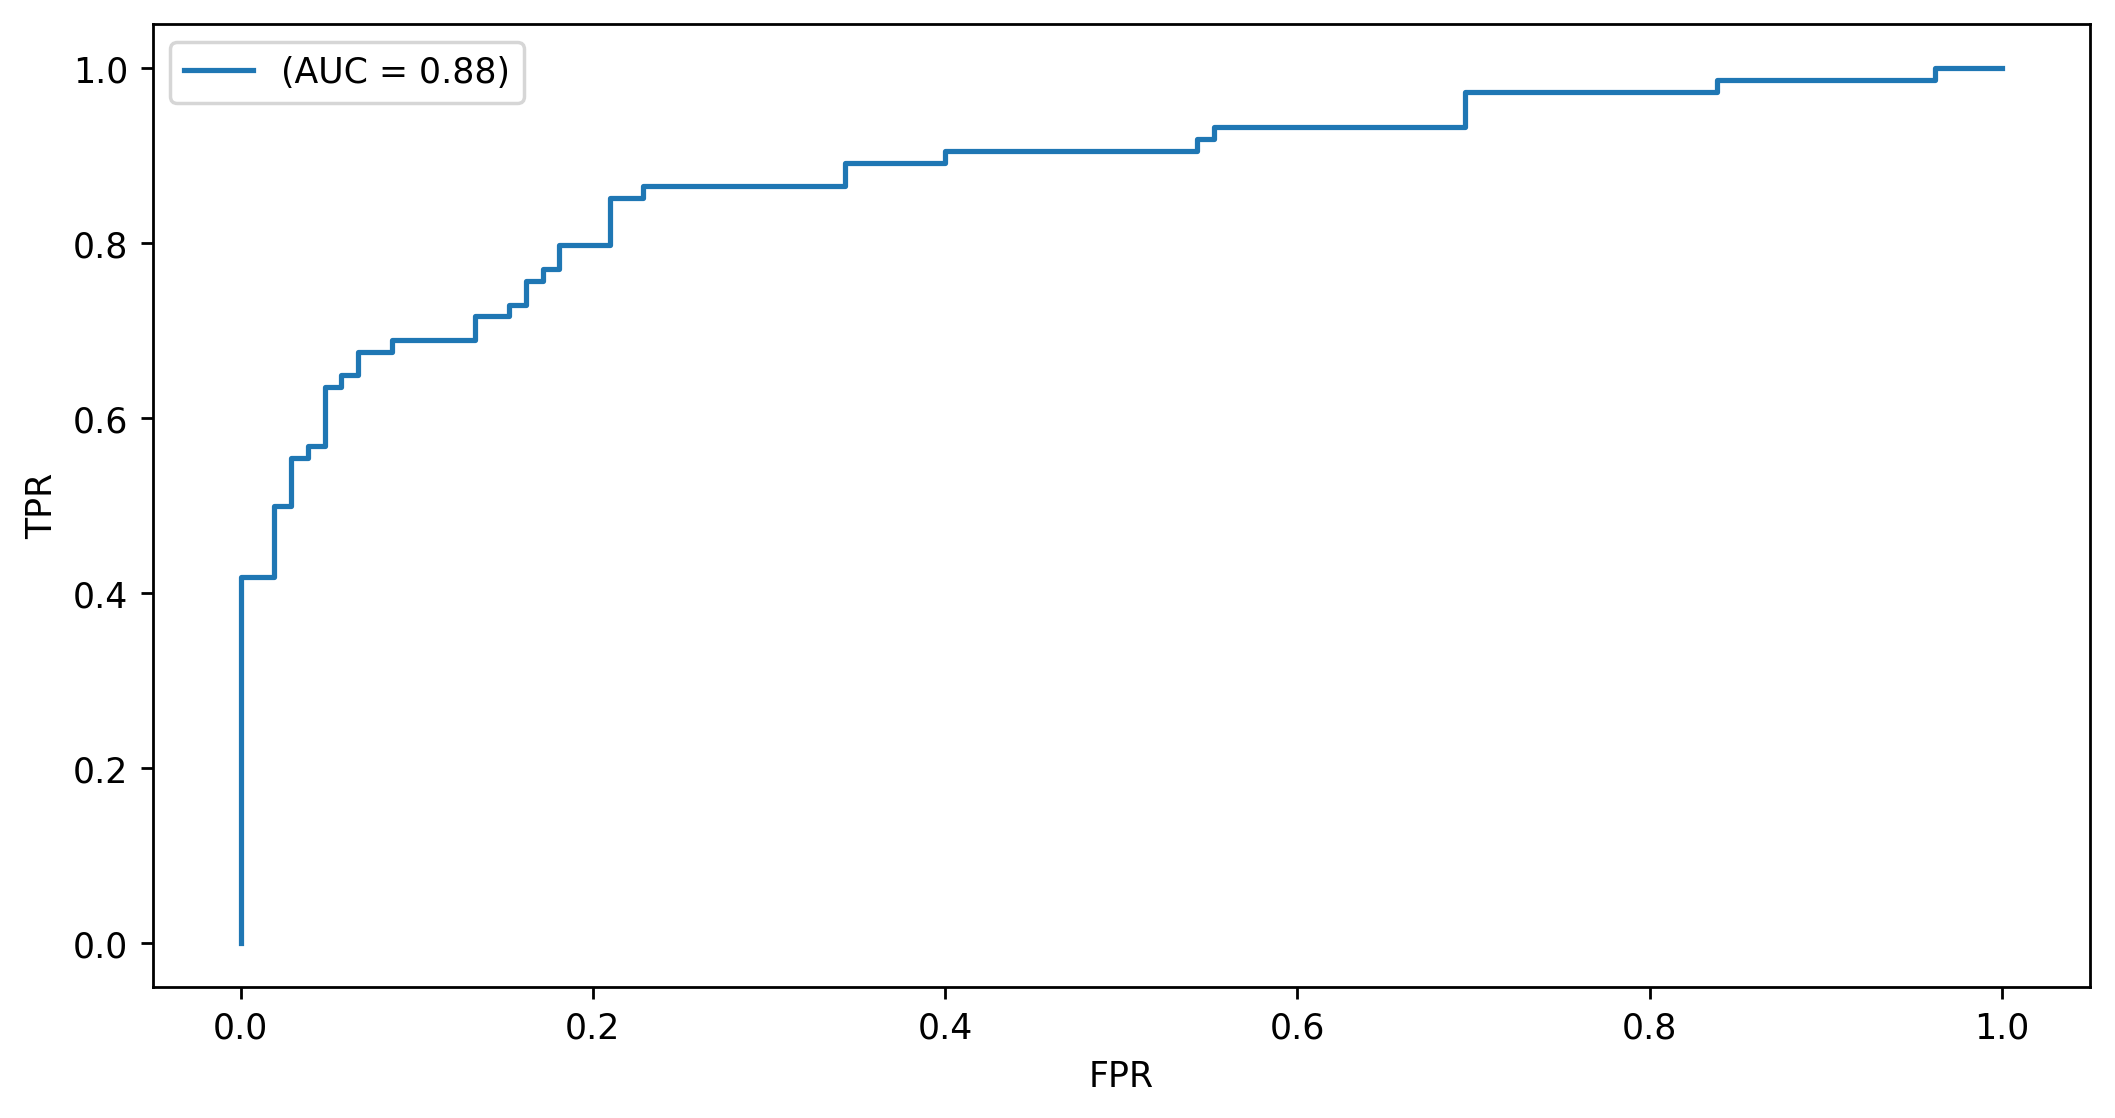

In [54]:
plt.plot(fpr,tpr, label = '(AUC = %0.2f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [55]:
prob

array([0.11099118, 0.26341209, 0.12161681, 0.90365643, 0.73592212,
       0.91786797, 0.69357019, 0.08382171, 0.76036371, 0.9007149 ,
       0.29302881, 0.06584294, 0.37805845, 0.14590462, 0.23868153,
       0.92053307, 0.26642591, 0.69363173, 0.28770357, 0.29117365,
       0.11008059, 0.35293662, 0.5958466 , 0.12212555, 0.10170957,
       0.06125359, 0.43128922, 0.26518967, 0.07171642, 0.58101406,
       0.12464459, 0.64104778, 0.51801632, 0.60115452, 0.12781152,
       0.12527497, 0.40022622, 0.69357019, 0.93215885, 0.09952426,
       0.24748084, 0.07513644, 0.09957481, 0.14219219, 0.58139616,
       0.08223506, 0.12474935, 0.11335635, 0.10977797, 0.3283321 ,
       0.71048022, 0.79360789, 0.03750935, 0.4627099 , 0.055264  ,
       0.91737603, 0.25798657, 0.93917906, 0.8192904 , 0.74472893,
       0.1185841 , 0.88108481, 0.81004884, 0.39185159, 0.14219219,
       0.69913765, 0.3637849 , 0.09702303, 0.14311269, 0.8695852 ,
       0.80132999, 0.9537834 , 0.53142202, 0.89841903, 0.11285

In [56]:
# to get the accuracy for every threshold selected
accuracy = []

for i in threshold:
    yprediction = np.where(prob>i,1,0)
    accuracy.append(accuracy_score(ytest,yprediction))

In [57]:
accuracy

[0.5865921787709497,
 0.5865921787709497,
 0.7541899441340782,
 0.7541899441340782,
 0.776536312849162,
 0.7821229050279329,
 0.7932960893854749,
 0.7988826815642458,
 0.7932960893854749,
 0.7988826815642458,
 0.8044692737430168,
 0.8100558659217877,
 0.8212290502793296,
 0.8156424581005587,
 0.8212290502793296,
 0.8212290502793296,
 0.8212290502793296,
 0.8156424581005587,
 0.7988826815642458,
 0.7988826815642458,
 0.7988826815642458,
 0.7932960893854749,
 0.7988826815642458,
 0.7988826815642458,
 0.8044692737430168,
 0.7988826815642458,
 0.8044692737430168,
 0.8044692737430168,
 0.7988826815642458,
 0.8100558659217877,
 0.8100558659217877,
 0.8044692737430168,
 0.7486033519553073,
 0.7486033519553073,
 0.7262569832402235,
 0.7206703910614525,
 0.6703910614525139,
 0.664804469273743,
 0.6480446927374302,
 0.6424581005586593,
 0.6480446927374302,
 0.6424581005586593,
 0.5698324022346368,
 0.5642458100558659,
 0.5754189944134078,
 0.553072625698324,
 0.5363128491620112,
 0.5027932960893

In [58]:
threshold_selection = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' : accuracy
})

In [59]:
threshold_selection

,Threshold,Accuracy
0,1.953783,0.586592
1,0.953783,0.586592
2,0.810049,0.754190
3,0.801330,0.754190
4,0.744729,0.776536
5,0.744269,0.782123
6,0.732722,0.793296
7,0.728945,0.798883
8,0.710480,0.793296
9,0.699138,0.798883


In [60]:
threshold_selection.sort_values(by = 'Accuracy', ascending = False)

,Threshold,Accuracy
14,0.657724,0.821229
16,0.601155,0.821229
15,0.640837,0.821229
12,0.678413,0.821229
17,0.595847,0.815642
13,0.672642,0.815642
30,0.332006,0.810056
29,0.339972,0.810056
11,0.693570,0.810056
26,0.410436,0.804469


## Considerations for Titanic Survival Prediction:

#### When Recall Might Matter:
In a real-world scenario, maximizing recall would mean trying to identify as many survivors as possible, even if it means predicting survival for some passengers who did not actually survive.
Missing survivors might be seen as a more critical error because it could mean failing to recognize passengers who should be saved.

#### When Precision Might Matter:
Precision would be prioritized if the goal was to confidently predict who survived without mistakenly labeling too many passengers as survivors.
However, in this scenario, false positives (predicting someone survived when they did not) might not be as severe as false negatives.

### Conclusion:
For this dataset, recall is typically of greater concern. We want to ensure that most of the actual survivors are correctly identified, even if it means some non-survivors are mistakenly predicted to survive. This approach aligns with scenarios where missing survivors is a more critical error than predicting a few non-survivors as survivors.

## Changing Threshold value 

In [61]:
from sklearn.preprocessing import binarize

### Here, by increasing accuracy to the highest, recall will not increase; it will decrease by some percentage. As we see that recall is of more concern, we will therefore increase recall by decreasing the threshold value

In [66]:
new_prediction = binarize([prob], threshold = 0.339972)[0]
new_prediction

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [67]:
print(classification_report(ytest, new_prediction))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       105
           1       0.74      0.85      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



In [68]:
confusion_matrix(ytest,new_prediction)     

array([[83, 22],
       [11, 63]], dtype=int64)

# Testing data

In [69]:
df2 = pd.read_csv('https://raw.githubusercontent.com/RahinUlde/DataSets/refs/heads/main/Titanic_test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
df2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [71]:
df2.shape

(418, 11)

## Dropping Columns

In [72]:
df2.drop(columns=['PassengerId','Cabin','Name'], inplace=True)

In [73]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


## Encoding

In [74]:
df2 = pd.get_dummies(data=df2,columns= ['Pclass'])

In [75]:
df2 = pd.get_dummies(data=df2,columns= ['Sex'])

In [76]:
df2 = pd.get_dummies(data=df2,columns= ['Embarked'])

In [77]:
df2.head()

,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,330911,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,363272,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,240276,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,315154,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,3101298,12.2875,0,0,1,1,0,0,0,1


## Scaling

In [78]:
df2['Fare_scaled'] = scaler.fit_transform(df2[['Fare']])

In [79]:
df2.drop(columns=['Fare'], inplace=True)

## Frequency of Ticket column

In [80]:
df2['Ticket_Frequency'] = df2.groupby('Ticket')['Ticket'].transform('count')

In [81]:
df2.drop(columns=['Ticket'], inplace=True)

In [82]:
df2.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled,Ticket_Frequency
0,34.5,0,0,0,0,1,0,1,0,1,0,-0.497811,1
1,47.0,1,0,0,0,1,1,0,0,0,1,-0.512660,1
2,62.0,0,0,0,1,0,0,1,0,1,0,-0.464532,1
3,27.0,0,0,0,0,1,0,1,0,0,1,-0.482888,1
4,22.0,1,1,0,0,1,1,0,0,0,1,-0.417971,1


## Handling missing value

In [83]:
df2.isna().sum()

Age                 86
SibSp                0
Parch                0
Pclass_1             0
Pclass_2             0
Pclass_3             0
Sex_female           0
Sex_male             0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
Fare_scaled          1
Ticket_Frequency     0
dtype: int64

In [84]:
df2[df2['Fare_scaled'].isnull()].index.tolist()

[152]

In [85]:
print(df2.iloc[[152]])

      Age  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
152  60.5      0      0         0         0         1           0         1   

     Embarked_C  Embarked_Q  Embarked_S  Fare_scaled  Ticket_Frequency  
152           0           0           1          NaN                 1  


In [86]:
df2.loc[151:153,'Fare_scaled']

151   -0.496618
152         NaN
153   -0.419837
Name: Fare_scaled, dtype: float64

In [87]:
df2.loc[150:155,'Age']

150    23.0
151     NaN
152    60.5
153    36.0
154    13.0
155    24.0
Name: Age, dtype: float64

In [88]:
df2[df2['Age'] == 60.5]

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled,Ticket_Frequency
152,60.5,0,0,0,0,1,0,1,0,0,1,NaN,1


In [89]:
df2.drop(152, inplace=True)

In [90]:
df2['Age'].fillna(df2['Age'].median(), inplace=True)

In [91]:
df2.isna().sum()

Age                 0
SibSp               0
Parch               0
Pclass_1            0
Pclass_2            0
Pclass_3            0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Fare_scaled         0
Ticket_Frequency    0
dtype: int64

In [92]:
df2.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled,Ticket_Frequency
0,34.5,0,0,0,0,1,0,1,0,1,0,-0.497811,1
1,47.0,1,0,0,0,1,1,0,0,0,1,-0.512660,1
2,62.0,0,0,0,1,0,0,1,0,1,0,-0.464532,1
3,27.0,0,0,0,0,1,0,1,0,0,1,-0.482888,1
4,22.0,1,1,0,0,1,1,0,0,0,1,-0.417971,1


In [93]:
#Prediction for testing dataset before setting threshol value
ypred_test = lg.predict(df2)

In [94]:
ypred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [95]:
prob2 = lg.predict_proba(df2)[:,1]

In [96]:
prob2

array([0.12119438, 0.40032741, 0.18240595, 0.10218488, 0.55103827,
       0.1411963 , 0.68112025, 0.22823515, 0.76562444, 0.07536727,
       0.10195634, 0.27796032, 0.90049494, 0.10263542, 0.81292869,
       0.8863603 , 0.32488814, 0.18023391, 0.54039313, 0.60436325,
       0.29282478, 0.14229878, 0.9013943 , 0.56129556, 0.90123393,
       0.04401443, 0.94450072, 0.174079  , 0.31019419, 0.09971322,
       0.14286682, 0.20755897, 0.45004766, 0.49444469, 0.45166769,
       0.19086914, 0.6079949 , 0.6478927 , 0.10772864, 0.11736641,
       0.10780661, 0.39700841, 0.07109855, 0.83475111, 0.81718898,
       0.10723724, 0.39646163, 0.1455058 , 0.87248408, 0.49676531,
       0.37474861, 0.39912054, 0.78050168, 0.86676669, 0.39954641,
       0.08013975, 0.08310552, 0.10715165, 0.08124496, 0.95935504,
       0.13077031, 0.25940584, 0.12755076, 0.72798903, 0.60292563,
       0.84806641, 0.74980053, 0.28304362, 0.49252591, 0.78599567,
       0.71671465, 0.11849409, 0.59439958, 0.50945449, 0.95411

In [98]:
# prediction for testing dataset after changing threshold value 
ypred_test2 =  binarize([prob2], threshold = 0.339972)[0]

In [99]:
ypred_test2

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0.

In [100]:
len(ypred_test2)

417

In [101]:
print(ypred_test[:25])
print(ypred_test2[:25])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1]
[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1.]
